In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('/content/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
data1=data.drop(['Outcome'],axis=1)

In [7]:
#Treating 0s as nan
data1.replace(0,np.nan,inplace=True)

In [8]:
data1.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

**Graphical Representation**

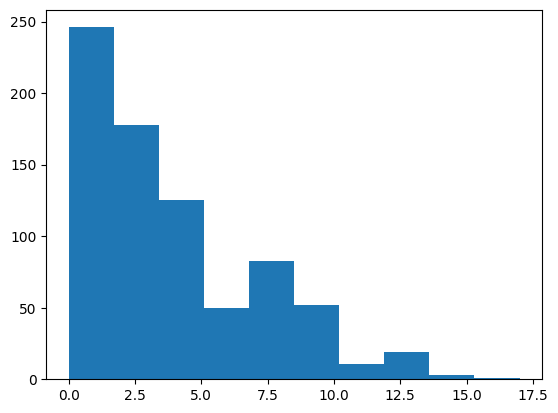

In [14]:
plt.hist(data['Pregnancies'])
plt.show()

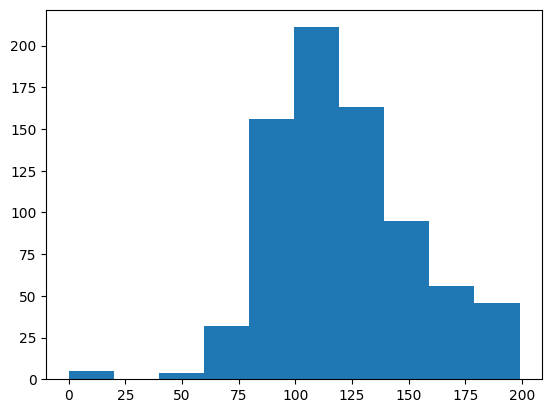

In [15]:
plt.hist(data['Glucose'])
plt.show()

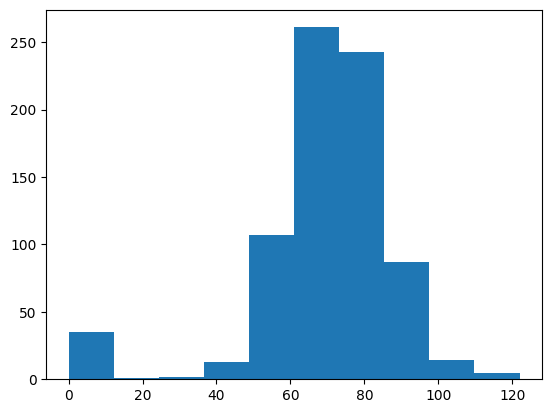

In [16]:
plt.hist(data['BloodPressure'])
plt.show()

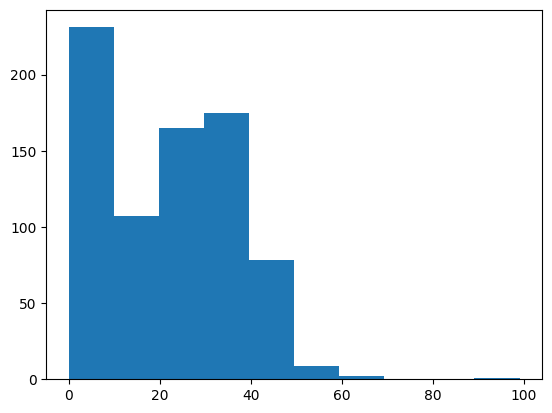

In [17]:
plt.hist(data['SkinThickness'])
plt.show()

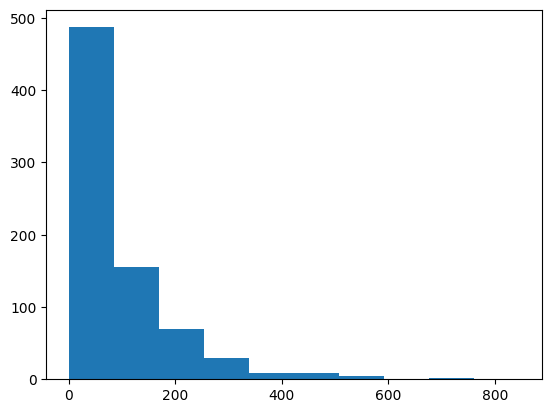

In [18]:
plt.hist(data['Insulin'])
plt.show()

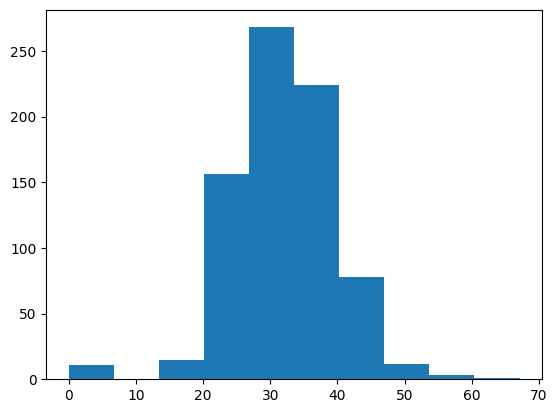

In [19]:
plt.hist(data['BMI'])
plt.show()

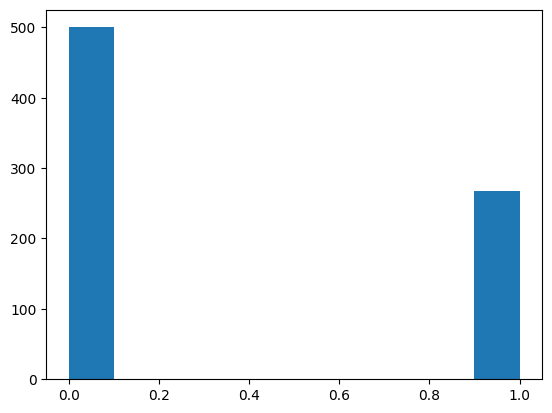

In [20]:
plt.hist(data['Outcome'])
plt.show()

**Filling Missing Values**

In [24]:
data['Pregnancies']=data['Pregnancies'].fillna(data['Pregnancies'].median())
data['Glucose']=data['Glucose'].fillna(data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].fillna(data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].fillna(data['SkinThickness'].median())
data['Insulin']=data['Insulin'].fillna(data['Insulin'].median())
data['BMI']=data['BMI'].fillna(data['BMI'].median())

In [25]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

*Since dataset is related to medical the outliers are not handled*

In [26]:
req_cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [27]:
x=data[req_cols]
y=data['Outcome']

In [28]:
x=pd.get_dummies(x,dtype=int)

In [29]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [32]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
y_pred=lr.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred)

0.7467532467532467

**Decision Tree**

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [37]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
y_preddt=dt.predict(x_test)

In [39]:
accuracy_score(y_test,y_preddt)

0.7532467532467533

**SVC**

In [40]:
from sklearn.svm import SVC
sv=SVC()

In [41]:
sv.fit(x_train,y_train)

SVC()

In [42]:
y_predsv=sv.predict(x_test)

In [43]:
accuracy_score(y_test,y_predsv)

0.7662337662337663

**Random Forest**

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [45]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
y_predrf=rf.predict(x_test)

In [47]:
accuracy_score(y_test,y_predrf)

0.7402597402597403

**Confusion Matrix**

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_test,y_pred)

array([[78, 21],
       [18, 37]])

**Neighbour Classifier (KNN)**

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
m=[]
n=np.arange(3,15)
for k in n:
  clf=KNeighborsClassifier(n_neighbors=k)
  clf.fit(x_train,y_train)
  pred=clf.predict(x_test)
  acc=accuracy_score(y_test,pred)
  m.append(acc)

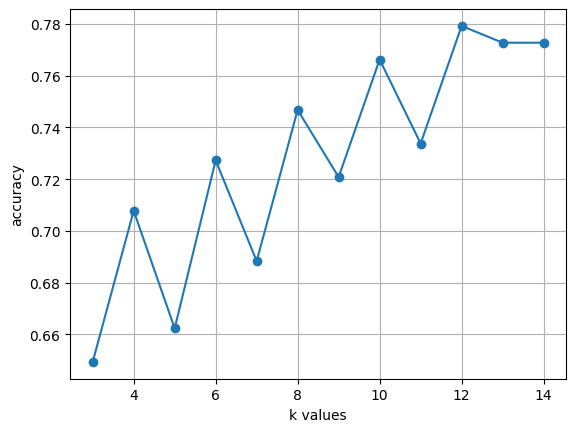

In [52]:
plt.plot(n,m,'o-')
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.grid()

In [53]:
clf=KNeighborsClassifier(n_neighbors=9)
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [54]:
y_pred_knn=clf.predict(x_test)
acc_knn=accuracy_score(y_test,y_pred_knn)
print(acc_knn)

0.7207792207792207


*SVC model has the best outcome of 0.7662337662337663*